In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/copy-of-used-cars-price-prediction-ds18/sample_submission.csv
/kaggle/input/copy-of-used-cars-price-prediction-ds18/train.csv
/kaggle/input/copy-of-used-cars-price-prediction-ds18/test.csv


# Copy of Used car's price prediction
# Предсказание стоимости автомобиля на вторичном рынке.


## Описание задачи

Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?! Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!

Целью проекта является разработанная модель предсказания стоимости автомобиля на вторичном рынке.

## Данные

#### train.csv - информация о продажах (~440000) автомобилей с аукционов, которые будут использоваться в качестве обучающих данных.
#### test.csv - информация о продажах (~110000) автомобилей с аукционов, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'sellingprice' для каждого автомобиля из этого датасета.
#### sample_submission.csv - файл предсказаний в правильном формате.
#### vin - идентификатор каждого автомобиля в тестовом наборе.
#### sellingprice - Целевой признак. Для каждого автомобиля предскажите числовое значение стоимости автомобиля.

## Описание полей данных

#### 'year' - год производства
#### 'make' - производитель
#### 'model' - модель
#### 'trim' - модификация
#### 'body' - тип кузова
#### 'transmission' - тип КПП
#### 'vin' - идентификатор (вин)
#### 'state' - штат регистрации
#### 'condition' - состояние по шкале (1-5)
#### 'odometer' - пробег в милях
#### 'color' - цвет кузова
#### 'interior' - цвет интерьера
#### 'seller' - продавец
#### 'sellingprice' - стоимость продажи
#### 'saledate' - дата продажи

# 1. Импорт библиотек и файлов исследования

In [2]:
import seaborn as sns

In [3]:
df_train = pd.read_csv('/kaggle/input/copy-of-used-cars-price-prediction-ds18/train.csv')
df_test = pd.read_csv('/kaggle/input/copy-of-used-cars-price-prediction-ds18/test.csv')

In [4]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [5]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


По условию задания у нас есть 2 датасета: 1 - тренировочный, который содержит около 440000 наблюдений для обучения модели и 2 - тестовый с около 110000 наблюдений для предсказания модели

# 2. предварительная обработка данных

In [6]:
display(df_train.duplicated().sum())
display(df_test.duplicated().sum())

0

0

Явных дубликатов в данных не выявлено

#### В данном датасете уникальный признак - это вин, проверим есть ли повторы по вин-номерам

In [7]:
display(df_train['vin'].duplicated().sum())
display(df_test['vin'].duplicated().sum())

0

0

По вин номеру так же не обнаружено дубликатов

#### Остальные признаки могут повторяться, поработаем с пропусками

In [8]:
display(df_train['make'].isna().sum()/440236)
display(df_train['model'].isna().sum()/440236)
display(df_train['trim'].isna().sum()/440236)
display(df_train['body'].isna().sum()/440236)
display(df_train['transmission'].isna().sum()/440236)
display(df_train['condition'].isna().sum()/440236)
display(df_train['odometer'].isna().sum()/440236)
display(df_train['color'].isna().sum()/440236)
display(df_train['interior'].isna().sum()/440236)

0.018269746227023688

0.018451466940459207

0.018937569848899227

0.023607792184192115

0.11689412042631679

0.02136354137326343

0.0001567341153381368

0.001331104225915191

0.001331104225915191

Первые три признака имеют почти сопоставимое количество пропусков, взглянем на них в таблице

In [9]:
display(df_train[df_train['make'].isna()].head())
display(df_train[df_train['model'].isna()].head())
display(df_train[df_train['trim'].isna()].head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
10,2007,NaN,NaN,NaN,NaN,automatic,5tfbv54157x019560,ca,3.1,102507.0,blue,gray,aaero sweet company,17250,Thu Jan 29 2015 03:30:00 GMT-0800 (PST)
42,2007,NaN,NaN,NaN,NaN,manual,jm1bk34l671745431,md,2.8,92656.0,blue,gray,credit acceptance corp/vrs/southfield,5600,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT)
63,2011,NaN,NaN,NaN,NaN,automatic,1fdne1bw5bda64735,ga,5.0,67159.0,white,gray,"vpsi, inc",13200,Thu Jun 04 2015 03:00:00 GMT-0700 (PDT)
64,2008,NaN,NaN,NaN,NaN,automatic,1gbdv13wx8d142776,ca,4.1,113582.0,white,gray,wholesale motor sales inc,4100,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
111,2006,NaN,NaN,NaN,NaN,automatic,3gnda13d36s611801,nv,2.8,129019.0,orange,gray,credit acceptance corp/vrs/southfield,2900,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
10,2007,NaN,NaN,NaN,NaN,automatic,5tfbv54157x019560,ca,3.1,102507.0,blue,gray,aaero sweet company,17250,Thu Jan 29 2015 03:30:00 GMT-0800 (PST)
42,2007,NaN,NaN,NaN,NaN,manual,jm1bk34l671745431,md,2.8,92656.0,blue,gray,credit acceptance corp/vrs/southfield,5600,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT)
63,2011,NaN,NaN,NaN,NaN,automatic,1fdne1bw5bda64735,ga,5.0,67159.0,white,gray,"vpsi, inc",13200,Thu Jun 04 2015 03:00:00 GMT-0700 (PDT)
64,2008,NaN,NaN,NaN,NaN,automatic,1gbdv13wx8d142776,ca,4.1,113582.0,white,gray,wholesale motor sales inc,4100,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
111,2006,NaN,NaN,NaN,NaN,automatic,3gnda13d36s611801,nv,2.8,129019.0,orange,gray,credit acceptance corp/vrs/southfield,2900,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
10,2007,NaN,NaN,NaN,NaN,automatic,5tfbv54157x019560,ca,3.1,102507.0,blue,gray,aaero sweet company,17250,Thu Jan 29 2015 03:30:00 GMT-0800 (PST)
42,2007,NaN,NaN,NaN,NaN,manual,jm1bk34l671745431,md,2.8,92656.0,blue,gray,credit acceptance corp/vrs/southfield,5600,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT)
63,2011,NaN,NaN,NaN,NaN,automatic,1fdne1bw5bda64735,ga,5.0,67159.0,white,gray,"vpsi, inc",13200,Thu Jun 04 2015 03:00:00 GMT-0700 (PDT)
64,2008,NaN,NaN,NaN,NaN,automatic,1gbdv13wx8d142776,ca,4.1,113582.0,white,gray,wholesale motor sales inc,4100,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
89,1999,mercedes,e300dt,NaN,NaN,automatic,wdbjf25h9xa799907,mi,NaN,219516.0,green,beige,warren toyota,400,Thu Dec 18 2014 13:10:00 GMT-0800 (PST)


Модели тяжело будет узнать цену без информации о производителе, модели и модификации, проэтому пропуски тут можно удалить. Уберем модификации

In [10]:
df_train = df_train.dropna(subset=['trim']).reset_index(drop=True)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431899 entries, 0 to 431898
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          431899 non-null  int64  
 1   make          431899 non-null  object 
 2   model         431819 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  381851 non-null  object 
 6   vin           431899 non-null  object 
 7   state         431899 non-null  object 
 8   condition     422617 non-null  float64
 9   odometer      431834 non-null  float64
 10  color         431327 non-null  object 
 11  interior      431327 non-null  object 
 12  seller        431899 non-null  object 
 13  sellingprice  431899 non-null  int64  
 14  saledate      431899 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 49.4+ MB


In [12]:
display(df_train['make'].isna().sum()/432193)
display(df_train['model'].isna().sum()/432193)
display(df_train['trim'].isna().sum()/432193)
display(df_train['body'].isna().sum()/432193)
display(df_train['transmission'].isna().sum()/432193)
display(df_train['condition'].isna().sum()/432193)
display(df_train['odometer'].isna().sum()/432193)
display(df_train['color'].isna().sum()/432193)
display(df_train['interior'].isna().sum()/440236)

0.0

0.00018510248893434183

0.0

0.004757133965612585

0.11580011707732425

0.02147651627860701

0.00015039577225915273

0.0013234827958805442

0.0012993031010639748

В модели еще остались пропуски. В датасете признаки transmission и condition имеют большое количество пропусков посмотрим на них далее, остальные пропуски можно удалить

In [13]:
df_train = df_train.dropna(subset=['model']).reset_index(drop=True)
df_train = df_train.dropna(subset=['body']).reset_index(drop=True)
df_train = df_train.dropna(subset=['odometer']).reset_index(drop=True)
df_train = df_train.dropna(subset=['color']).reset_index(drop=True)
df_train = df_train.dropna(subset=['interior']).reset_index(drop=True)


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429146 entries, 0 to 429145
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          429146 non-null  int64  
 1   make          429146 non-null  object 
 2   model         429146 non-null  object 
 3   trim          429146 non-null  object 
 4   body          429146 non-null  object 
 5   transmission  379543 non-null  object 
 6   vin           429146 non-null  object 
 7   state         429146 non-null  object 
 8   condition     420328 non-null  float64
 9   odometer      429146 non-null  float64
 10  color         429146 non-null  object 
 11  interior      429146 non-null  object 
 12  seller        429146 non-null  object 
 13  sellingprice  429146 non-null  int64  
 14  saledate      429146 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 49.1+ MB


In [15]:
df_train.corr()

/tmp/ipykernel_32/299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,year,condition,odometer,sellingprice
year,1.000000,0.549802,-0.778137,0.586020
condition,0.549802,1.000000,-0.537654,0.535640
odometer,-0.778137,-0.537654,1.000000,-0.581504
sellingprice,0.586020,0.535640,-0.581504,1.000000


In [16]:
df_train['year'].value_counts()

2012    79655
2013    77409
2014    63550
2011    37719
2008    24198
2007    22770
2010    20129
2006    19633
2009    15871
2005    15617
2004    12793
2003     9998
2002     7575
2015     7265
2001     5093
2000     3423
1999     2248
1998     1502
1997     1026
1996      587
1995      493
1994      280
1993      134
1992       94
1991       50
1990       34
Name: year, dtype: int64

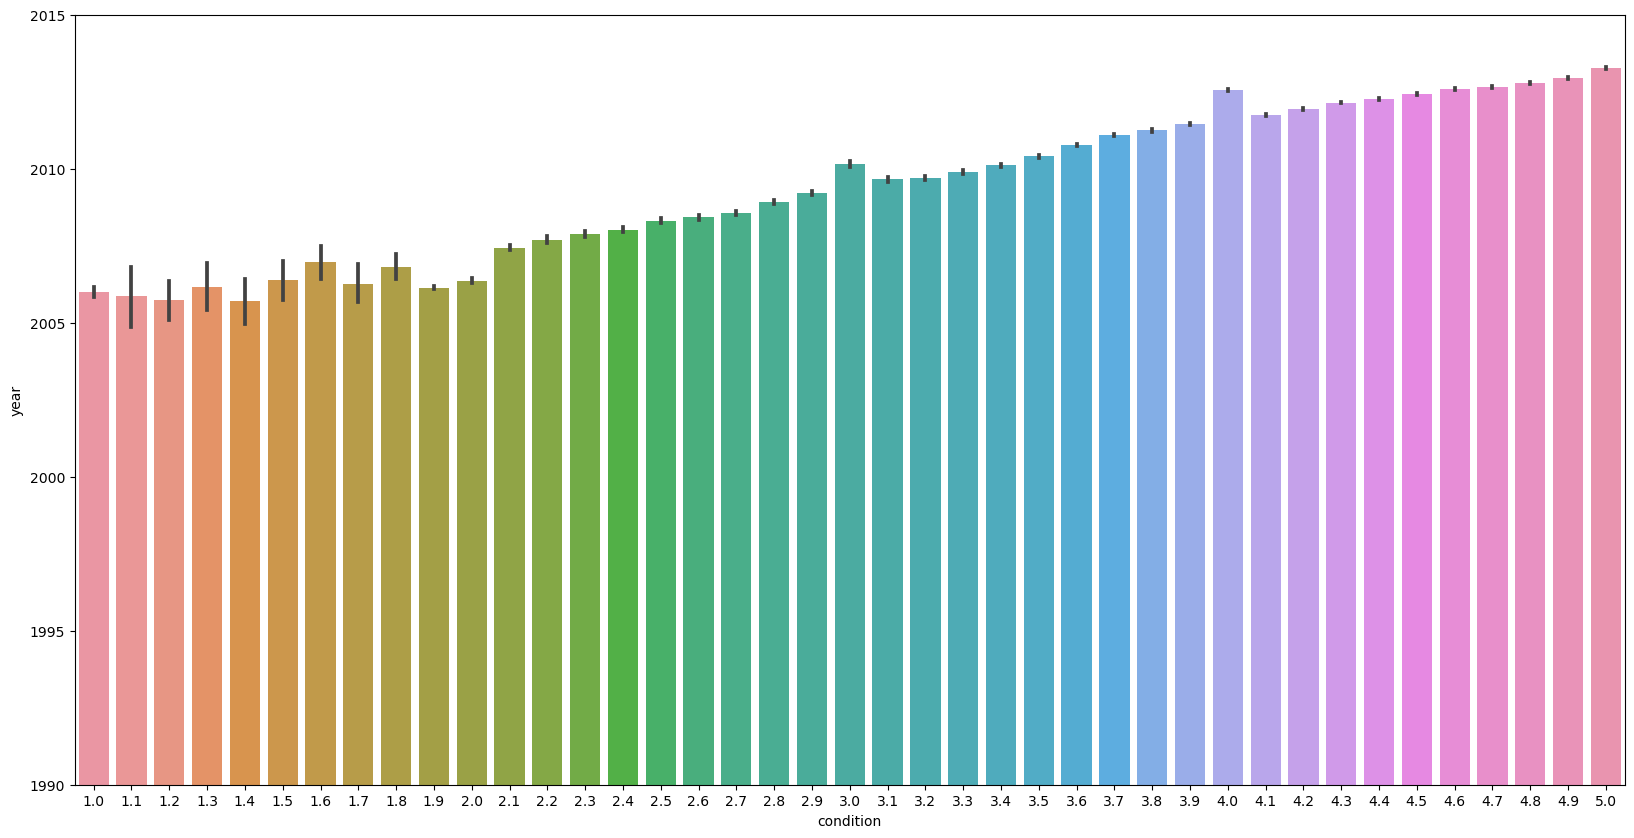

In [17]:
ax=sns.barplot(data=df_train,x='condition',y='year')
ax.set_ylim(1990, 2015)
ax.figure.set_size_inches(20,10)

In [18]:
median_condition = df_train.groupby('year')['condition'].transform('median')
df_train['condition'] = df_train['condition'].fillna(median_condition)

In [19]:
df_train.info()
df_train['transmission'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429146 entries, 0 to 429145
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          429146 non-null  int64  
 1   make          429146 non-null  object 
 2   model         429146 non-null  object 
 3   trim          429146 non-null  object 
 4   body          429146 non-null  object 
 5   transmission  379543 non-null  object 
 6   vin           429146 non-null  object 
 7   state         429146 non-null  object 
 8   condition     429146 non-null  float64
 9   odometer      429146 non-null  float64
 10  color         429146 non-null  object 
 11  interior      429146 non-null  object 
 12  seller        429146 non-null  object 
 13  sellingprice  429146 non-null  int64  
 14  saledate      429146 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 49.1+ MB


automatic    366398
manual        13145
Name: transmission, dtype: int64

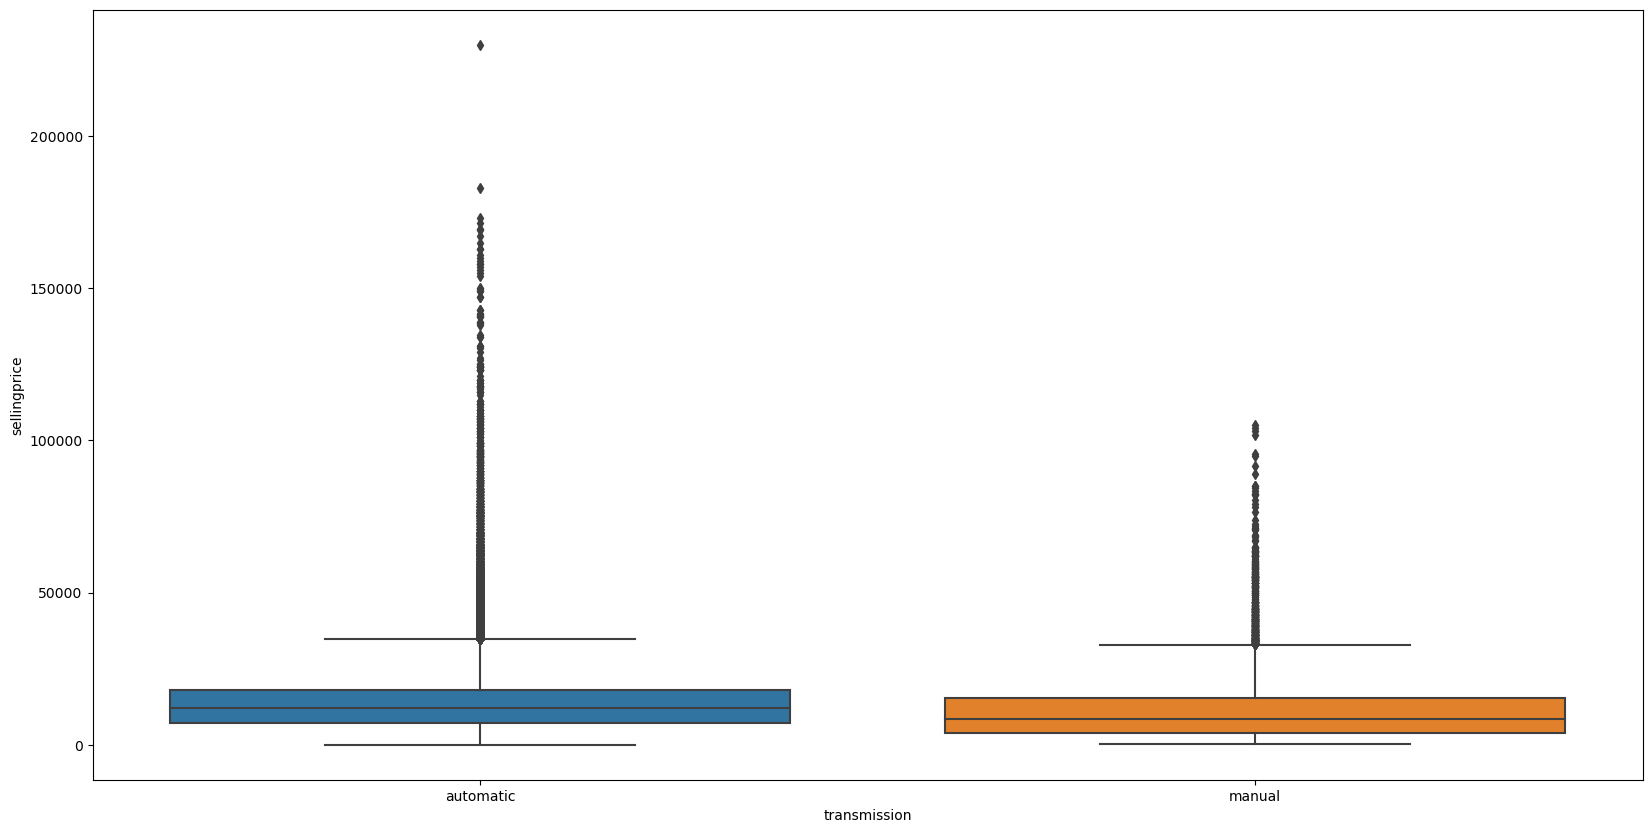

In [20]:
ax=sns.boxplot(data=df_train,x='transmission',y='sellingprice')

ax.figure.set_size_inches(20,10)

По графикам  видно, что механика дешевле автомата

In [21]:
automatic_mean_price = df_train[df_train['transmission']== 'automatic']['sellingprice'].mean()
print(automatic_mean_price)

manual_mean_price = df_train[df_train['transmission'] == 'manual']['sellingprice'].mean()
print(manual_mean_price)

13620.956088734109
11072.903765690377


посмотрим, среднюю по пропущенным 

In [22]:
nan_mean_price = df_train[df_train['transmission'].isna()]['sellingprice'].mean()
print(nan_mean_price)

14933.283652198455


Среднее пустых ближе к автомату, поэтому с большей долей вероятности в пропусках больше автоматов

In [23]:
df_train['transmission'] = df_train['transmission'].fillna('automatic')

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429146 entries, 0 to 429145
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          429146 non-null  int64  
 1   make          429146 non-null  object 
 2   model         429146 non-null  object 
 3   trim          429146 non-null  object 
 4   body          429146 non-null  object 
 5   transmission  429146 non-null  object 
 6   vin           429146 non-null  object 
 7   state         429146 non-null  object 
 8   condition     429146 non-null  float64
 9   odometer      429146 non-null  float64
 10  color         429146 non-null  object 
 11  interior      429146 non-null  object 
 12  seller        429146 non-null  object 
 13  sellingprice  429146 non-null  int64  
 14  saledate      429146 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 49.1+ MB


Работу с пропусками закончили

### Поиск и коррекция неявных дубликатов

#### Оценка признака make

In [25]:
unique_train = np.sort(df_train['make'].unique())
display(unique_train)

array(['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT',
       'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'MINI',
       'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram',
       'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki',
       'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart'], dtype=object)

In [26]:
df_test['make'] = df_test['make'].astype(str)
unique_test = np.sort(df_test['make'].unique())
display(unique_test)

array(['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT',
       'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan',
       'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram',
       'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki',
       'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'audi', 'bmw',
       'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler',
       'dodge', 'ford', 'ford tk', 'gmc', 'honda', 'hyundai',
       'hyundai tk', 'jeep', 'kia', 'land rover', 'landrover', 'lexus',
       'lincoln', 'mazda', 'mercedes', 'mercury', 'mitsubishi', 'nan',
       'nissan', 'oldsmobile', 'pontiac', 'porsche', 'smart', 'subaru',
       'toyota', 'volkswagen', 'vw'], dtype

Приведем данные к нижнему ригистру

In [27]:
df_train['make'] = df_train['make'].str.lower()

df_test['make'] = df_test['make'].str.lower()

In [28]:
unique_train = np.sort(df_train['make'].unique())
display(unique_train)

array(['acura', 'aston martin', 'audi', 'bentley', 'bmw', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'ferrari',
       'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer',
       'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'lamborghini', 'land rover', 'lexus', 'lincoln', 'maserati',
       'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi',
       'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram',
       'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru',
       'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [29]:
df_test['make'] = df_test['make'].astype(str)
unique_test = np.sort(df_test['make'].unique())
display(unique_test)

array(['acura', 'aston martin', 'audi', 'bentley', 'bmw', 'buick',
       'cadillac', 'chev truck', 'chevrolet', 'chrysler', 'daewoo',
       'dodge', 'ferrari', 'fiat', 'fisker', 'ford', 'ford tk', 'geo',
       'gmc', 'honda', 'hummer', 'hyundai', 'hyundai tk', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'land rover', 'landrover',
       'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mercedes',
       'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nan', 'nissan',
       'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram',
       'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru',
       'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', 'vw'],
      dtype=object)

В test есть неявные дубликаты в признаке make (chev truck, ford tk, hyundai tk, landrover, mercedes, vw) 

In [30]:
df_test.loc[df_test['make'] == 'chev truck', 'make'] = 'chevrolet'
df_test.loc[df_test['make'] == 'ford tk', 'make'] = 'ford'
df_test.loc[df_test['make'] == 'hyundai tk', 'make'] = 'hyundai'
df_test.loc[df_test['make'] == 'landrover', 'make'] = 'land rover'
df_test.loc[df_test['make'] == 'mercedes', 'make'] = 'mercedes-benz'
df_test.loc[df_test['make'] == 'vw', 'make'] = 'volkswagen'

In [31]:
df_test['make'] = df_test['make'].astype(str)
unique_test = np.sort(df_test['make'].unique())
display(unique_test)

array(['acura', 'aston martin', 'audi', 'bentley', 'bmw', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'ferrari',
       'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer',
       'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'land rover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda',
       'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nan', 'nissan',
       'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram',
       'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru',
       'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Неявные дубликаты в test в признаке make убраны

Остальные качетвенные признаки приведем к нижнему регистру

In [32]:
df_train['model'] = df_train['model'].str.lower()
df_train['trim'] = df_train['trim'].str.lower()
df_train['body'] = df_train['body'].str.lower()


df_test['model'] = df_test['model'].str.lower()
df_test['trim'] = df_test['trim'].str.lower()
df_test['body'] = df_test['body'].str.lower()

In [33]:
df_train['saledate']=pd.to_datetime(df_train['saledate'],utc=True)
df_test['saledate']=pd.to_datetime(df_test['saledate'],utc=True)

# 3. Разведочный анализ

Оценим целевой признак

In [34]:
sellingprice_stats = df_train['sellingprice'].describe()
median_sellingprice = df_train['sellingprice'].median()
mode_sellingprice = df_train['sellingprice'].mode().values[0]

print(sellingprice_stats)
print("Median selling price:", median_sellingprice)
print("Mode selling price:", mode_sellingprice)


count    429146.000000
mean      13694.593584
std        9677.205108
min           1.000000
25%        7000.000000
50%       12200.000000
75%       18300.000000
max      230000.000000
Name: sellingprice, dtype: float64
Median selling price: 12200.0
Mode selling price: 11000


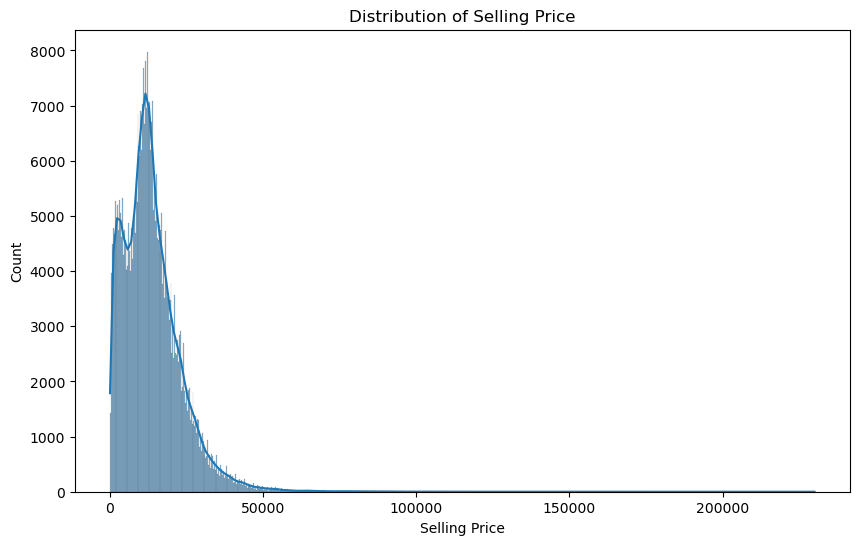

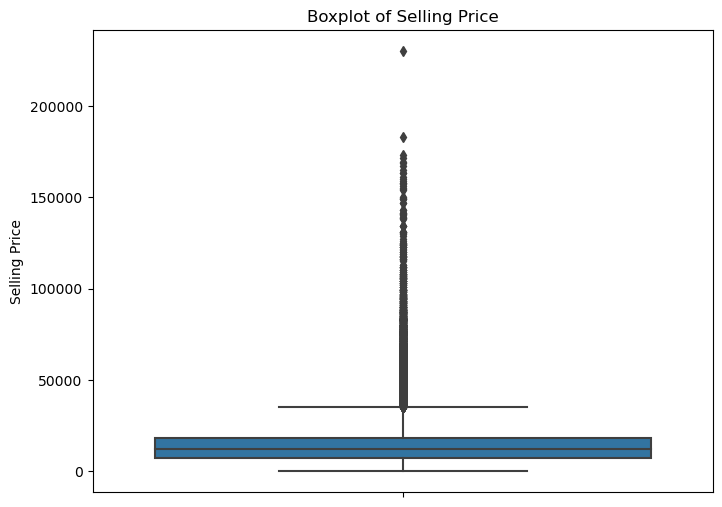

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма распределения
plt.figure(figsize=(10, 6))
sns.histplot(df_train['sellingprice'], kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.title('Distribution of Selling Price')
plt.show()

# Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_train['sellingprice'])
plt.ylabel('Selling Price')
plt.title('Boxplot of Selling Price')
plt.show()


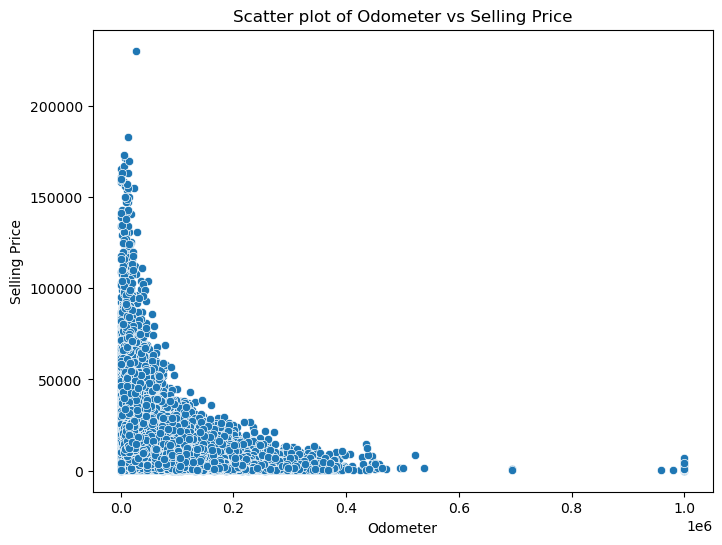

In [36]:

# Диаграмма разброса
plt.figure(figsize=(8, 6))
sns.scatterplot(x='odometer', y='sellingprice', data=df_train)
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.title('Scatter plot of Odometer vs Selling Price')
plt.show()

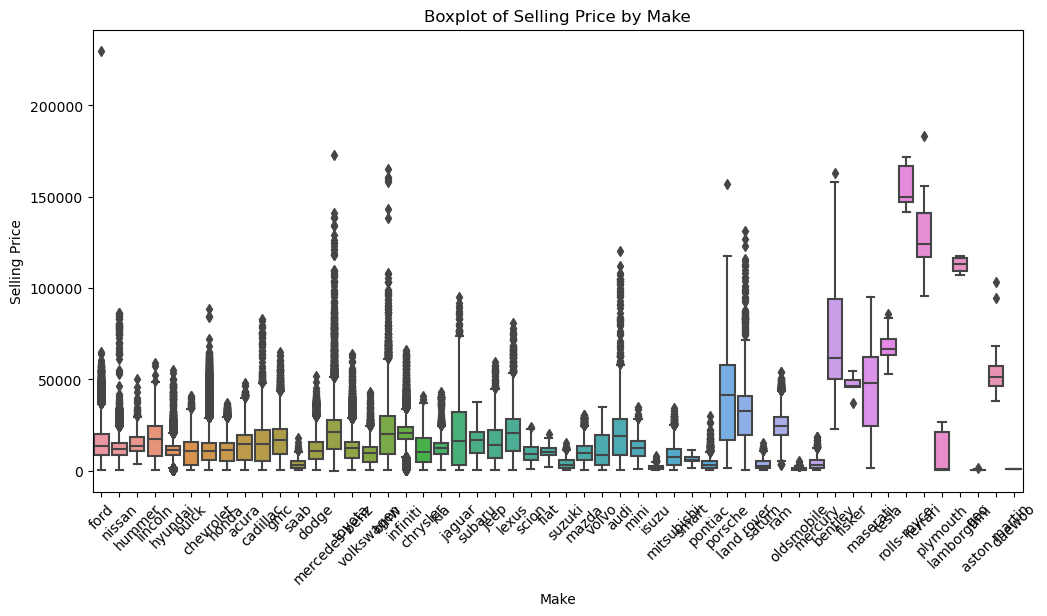

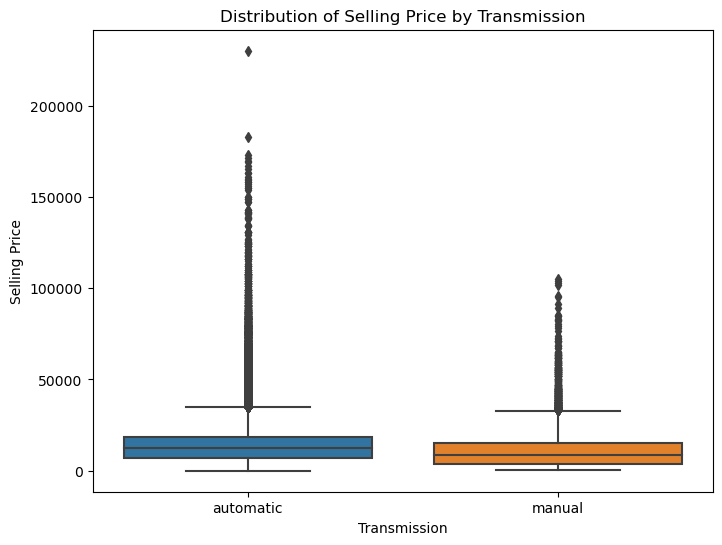

In [37]:
# Ящик с усами для категориального признака 'make'
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='sellingprice', data=df_train)
plt.xlabel('Make')
plt.ylabel('Selling Price')
plt.title('Boxplot of Selling Price by Make')
plt.xticks(rotation=45)
plt.show()

# Столбчатая диаграмма для категориального признака 'transmission'
plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='sellingprice', data=df_train)
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Price by Transmission')
plt.show()


# 4. Разработка новых синтетических признаков

Добавим возраст автормобилей

In [38]:
df_train['age'] = (2015 - df_train['year'])
df_test['age'] = (2015 - df_test['year'])


Добавим месяц продажи

In [39]:
df_train['month'] = df_train['saledate'].dt.month
df_test['month'] = df_test['saledate'].dt.month

# 5. Проверка на мультиколинеарность 


/tmp/ipykernel_32/3623878688.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


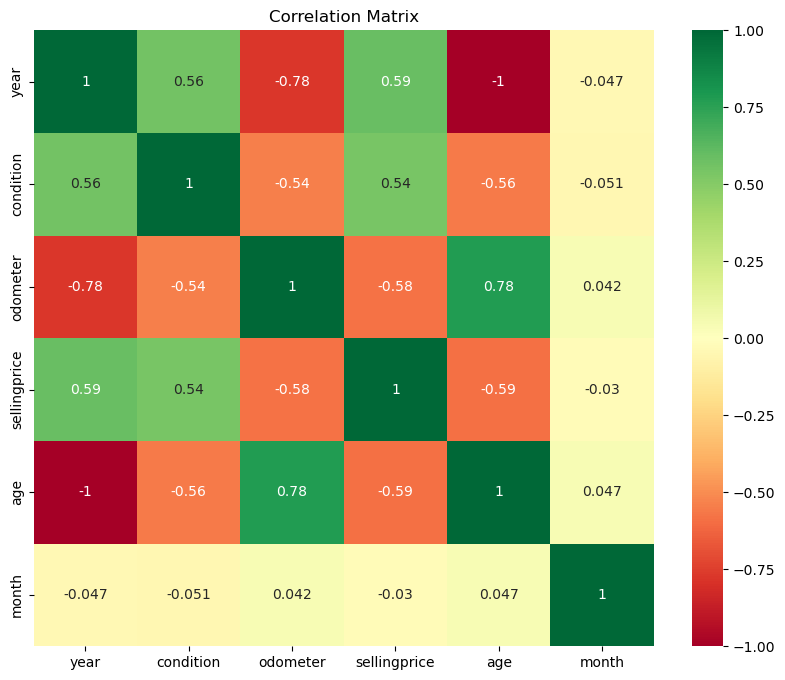

In [40]:
# Матрица корреляции
correlation_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Сильная корреляция между year и odometer, можно удалить year 

# 6. Отбор финального набора обучающих признаков

удалим year, vin 

In [41]:
df_train = df_train.drop(['year', 'vin', 'saledate'], axis=1)

df_test = df_test.drop(['year', 'vin', 'saledate'], axis=1)

# 7. Выбор и обучение моделей

Для лучшего качества моделей произведем преобразование категориальных признаков по методу Ordinal encoder

In [42]:

from sklearn.preprocessing import OrdinalEncoder

category = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoded_categories_train = encoder.fit_transform(df_train[category])
encoded_categories_test = encoder.transform(df_test[category])
df_train[category] = encoded_categories_train
df_test[category] = encoded_categories_test


In [43]:
from sklearn.model_selection import train_test_split

# Разделение на признаки (features) и целевую переменную (target)
features = df_train.drop('sellingprice', axis=1)  
target = df_train['sellingprice']  

train_features, valid_features, train_target, valid_target = train_test_split(features, target, test_size=0.2)

# train_features - обучающие признаки
# train_target - обучающая целевая переменная
# valid_features - валидационные признаки
# valid_target - валидационная целевая переменная


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Создание экземпляра случайного леса
rf = RandomForestRegressor(random_state=42)

# Определение сетки гиперпараметров для подбора
param_grid = {
    'n_estimators': [10, 50],  # пример значений для количества деревьев
    'max_depth': [5, 10],  # пример значений для максимальной глубины деревьев
}

# Определение метрики оценки (MAPE)
scoring = make_scorer(lambda y_true, y_pred: 100 * (abs(y_true - y_pred) / y_true).mean(), greater_is_better=False)

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring)

# Обучение GridSearchCV на обучающих данных
grid_search.fit(train_features, train_target)

# Получение лучшей модели
best_rf = grid_search.best_estimator_

# Предсказание на валидационных данных
predictions = best_rf.predict(valid_features)

best_params = grid_search.best_params_
print("Лучшие значения гиперпараметров:", best_params)

Лучшие значения гиперпараметров: {'max_depth': 10, 'n_estimators': 50}


In [45]:
from sklearn.metrics import mean_absolute_percentage_error

# Предсказание на валидационных данных
predictions = best_rf.predict(valid_features)

# Вычисление MAPE
mape = mean_absolute_percentage_error(valid_target, predictions)

# Вывод MAPE

print("MAPE:", mape)

MAPE: 0.32344108516050385


In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Создание экземпляра дерева решений
tree = DecisionTreeRegressor(random_state=42)

# Определение сетки гиперпараметров для подбора
param_grid = {
    'max_depth': [1, 5, 10],  # пример значений для максимальной глубины дерева
    'min_samples_split': [2, 5, 10],  # пример значений для минимального числа образцов для разделения узла
}

# Определение метрики оценки (MAPE)
scoring = make_scorer(lambda y_true, y_pred: 100 * (abs(y_true - y_pred) / y_true).mean(), greater_is_better=False)

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring=scoring)

# Обучение GridSearchCV на обучающих данных
grid_search.fit(train_features, train_target)

# Получение лучшей модели
best_tree = grid_search.best_estimator_

# Предсказание на валидационных данных
predictions = best_tree.predict(valid_features)

best_params = grid_search.best_params_
print("Лучшие значения гиперпараметров:", best_params)


Лучшие значения гиперпараметров: {'max_depth': 10, 'min_samples_split': 2}


In [47]:
from sklearn.metrics import mean_absolute_percentage_error

# Предсказание на валидационных данных
predictions = best_tree.predict(valid_features)

# Вычисление MAPE
mape = mean_absolute_percentage_error(valid_target, predictions)

# Вывод MAPE

print("MAPE:", mape)

MAPE: 0.34179643430726486


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Создание экземпляра модели регрессии
regression = LinearRegression()

# Определение сетки гиперпараметров для подбора
param_grid = {
    'fit_intercept': [True, False],  # пример значений для параметра fit_intercept
}

# Определение метрики оценки (MAPE)
scoring = make_scorer(lambda y_true, y_pred: 100 * (abs(y_true - y_pred) / y_true).mean(), greater_is_better=False)

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=regression, param_grid=param_grid, scoring=scoring)

# Обучение GridSearchCV на обучающих данных
grid_search.fit(train_features, train_target)

# Получение лучшей модели
best_regression = grid_search.best_estimator_

# Предсказание на валидационных данных
predictions = best_regression.predict(valid_features)

best_params = grid_search.best_params_
print("Лучшие значения гиперпараметров:", best_params)

Лучшие значения гиперпараметров: {'fit_intercept': False}


In [49]:
# Предсказание на валидационных данных
predictions = best_regression.predict(valid_features)
​
# Вычисление MAPE
mape = mean_absolute_percentage_error(valid_target, predictions)
​
# Вывод MAPE
print("MAPE:", mape)

SyntaxError: invalid non-printable character U+200B (1866972846.py, line 3)

Лучший результат у случайного леса, проверим его на тестовых данных

# 8. Итоговая оценка качества предсказания лучшей модели


В тестовых данных есть пропуски, преобразуем их чтобы модель не ругалась

In [51]:
from sklearn.impute import SimpleImputer

# Создание экземпляра преобразователя для заполнения пропущенных значений
imputer = SimpleImputer()

# Заполнение пропущенных значений в тестовой выборке
df_test_imputed = imputer.fit_transform(df_test)

In [52]:
# предскажем цены на основании признаков из тестового датасета

predictions = pd.Series(best_rf.predict(df_test_imputed))

display(predictions.head())

predictions.info()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0     4217.835018
1    22899.297176
2    19053.804251
3    10113.642201
4    27333.183412
dtype: float64

<class 'pandas.core.series.Series'>
RangeIndex: 110058 entries, 0 to 110057
Series name: None
Non-Null Count   Dtype  
--------------   -----  
110058 non-null  float64
dtypes: float64(1)
memory usage: 860.0 KB


# 9. Анализ важности признаков

         feature  importance
0   transmission    0.000053
1          color    0.000137
2          month    0.000243
3          state    0.000286
4       interior    0.000377
5         seller    0.000951
6           trim    0.052630
7      condition    0.060876
8          model    0.063362
9            age    0.094715
10          make    0.125985
11          body    0.151050
12      odometer    0.449336


<Axes: title={'center': 'График важности признаков'}>

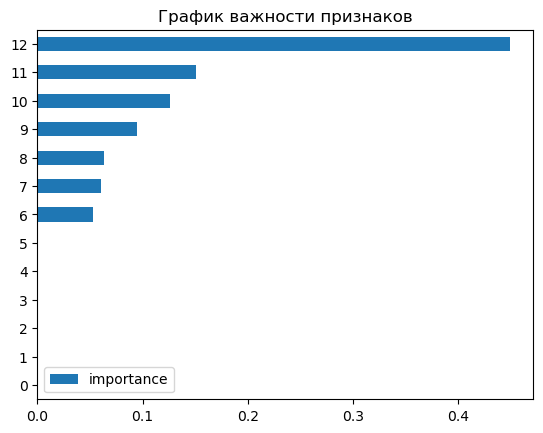

In [53]:
df_test_imputed_new = pd.DataFrame(df_test_imputed, columns=df_test.columns)

# В виде таблицы выведем признаки по значимости
importances = best_rf.feature_importances_
feature_list = list(df_test_imputed_new.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance', ascending=True).reset_index(drop=True)

# Вывод таблицы признаков по значимости
print(feature_results)
feature_results.plot.barh(title='График важности признаков')

На графике признаки в порядка убывания важности  

# 10. Выгрузка файла и Итоговый вывод

In [54]:
submission = pd.read_csv('/kaggle/input/copy-of-used-cars-price-prediction-ds18/test.csv')
submission = submission['vin']

In [55]:
sample_submission = pd.DataFrame()
sample_submission['vin'] = submission
sample_submission['sellingprice'] = predictions

In [56]:
output = pd.DataFrame(sample_submission)
output.to_csv('submission.csv',index=False)

In [57]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           110058 non-null  object 
 1   sellingprice  110058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [58]:
sample_submission.head()

,vin,sellingprice
0,1g6dp567450124779,4217.835018
1,1gtw7fca7e1902207,22899.297176
2,jn8az1mw6dw303497,19053.804251
3,2g1wf5e34d1160703,10113.642201
4,1n6aa0ec3dn301209,27333.183412


В результате проекта Мастерская,разработана и обучена модель, которая предсказывает цены на автомобили. При разработке модели главная сложность заключалась в работе с пропущенными значениями, что значительно снижает качество предсказаний. Можно порекомендовать продавцу сделать основные признаки trim condition model age make body odometer обязательными для внесения при публикации объявления. В процессе обучения, качество моделей было проверено показателем MAPE, который представляет отклонение от истинных ответов в виде доли. Выбрана модель с лучшим показателем MAPE.